참고교제 : 딥러닝 입문 with 텐서플로우 2.x (조휘용 지음, 로드북)

# 딥러닝(Deep Learning) 🧠
인공지능 ⬅️ 머신러닝 ⬅️ 딥러닝 

- 깊은 신경망을 의미하는 용어 
- 딥러닝은 깊게 쌓인 신경망들이 데이터를 학습하고, 최종적으로 정답을 도출하게함 
- 주로 텐서플로우, 케라스를 사용하여 딥러닝의 범위를 다룬다 


---


# Tensor Flow
- 2015년 구글에서 인공지능 파트인 구글브레인에서 개발하고 오프소스 라이선스로 공개 
- Data Flow Graph를 기반으로 하는 umerical computation을 하는 오픈소스 소프트웨어 라이브러리

#### 장점 
- 코드 수정없이 데스킄탑, 서버 혹은 모바일 디바이스에서 CPU나 GPU, TPU를 사용하여 연산 수행 
- 분산 실행환경이 가능 
- 아이디어 테스트에서 서비스 단계까지 모두 이용가능 
- 계산 구조와 목표함수만 정의하면 자동으로 미분 계산처리 

#### Data Flow Graph
- 수치 계산과 데이터의 흐름을 노드(node)와 엣지(edge)를 사용한 양방향 그래프(directed graph)로 표현 
  - 노드 : 수치연산 
  - 엣지 : 노드 사이를 이동하는 다차원 데이터 텐서 



---


## TensorFlow 실습 
✔️ 10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 패션 MNIST 데이터셋을 사용 <br>
✔️ 각 이미지 해상도(28*28), 개별 옷 품목을 나타냄

* 데이터 준비

In [39]:
# 라이브러리 가져오기 
import tensorflow as tf
from tensorflow import keras

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# 텐서플로우 버전 
print(tf.__version__)

2.6.0


* 데이터 가져오기

In [41]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data() 

In [42]:
# 데이터 확인 
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [43]:
# 6만개의 데이터 
train_labels, len(train_labels)

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8), 60000)

In [44]:
# 라벨의 이름을 붙여준다 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

* 데이터 전처리(preprocessing)
  - Tensorflow에서는 '부동소수점'을 사용하기 때문에 Scaling을 해야한다. 
  - 부동소수점 : 0 ~ 1

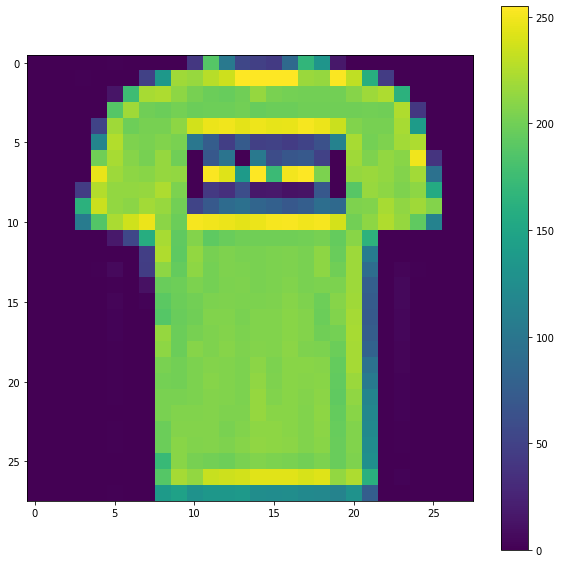

In [45]:
plt.figure(figsize=(10,10))
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

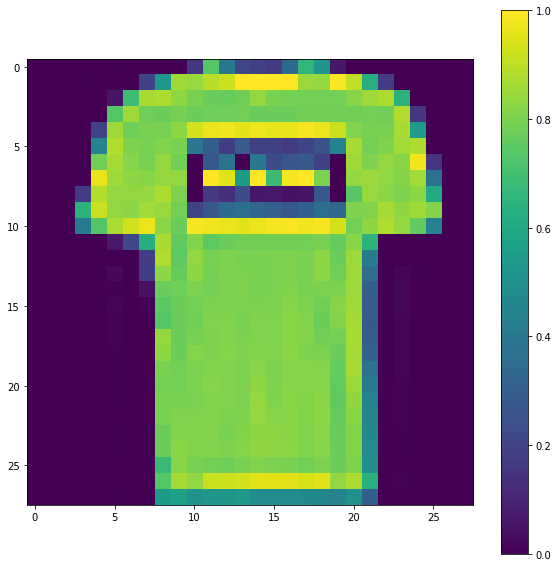

In [46]:
# 데이터 스케일링 

train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

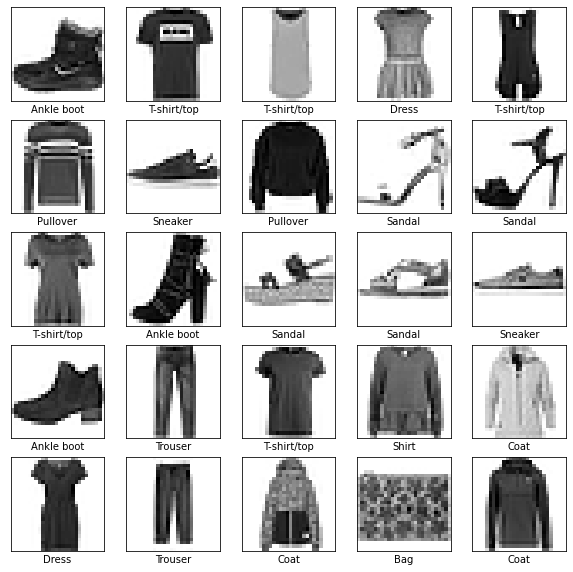

In [47]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

* 모델 구성(1) - 층 설정
  - tensorflow는 모델을 직접 만들어 줘야함 

In [48]:
# 층 구성 
model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28,28)),
      keras.layers.Dense(128, activation=tf.nn.relu),
      keras.layers.Dense(10, activation=tf.nn.softmax)
])

* 모델 구성(2) - 모델 컴파일 
  - 손실 함수(loss function) : 훈련하는 동안 모델의 오차를 측정, 모델의 학습이 올바른 방향으로 향하도록 이 함수 값을 최소화 해야 함 
  - 옵티마이저 (Optimizer) : 데이터와 손실함수를 바탕으로 모델의 업데이트 방법을 결정 
  - 지표(metrics) : 훈련단계와 테스트 단계를 모니터링 하기 위해 사용 

In [49]:
model.compile(optimizer='adam',
              loss ='sparse_categorical_crossentropy',
              metrics=['accuracy'])

* 모델 훈련 
  - 훈련 데이터를 모델에 주입 
  - 모델이 이미지와 레이블을 매핑하는 방법 
  - 테스트 세트에 대한 모델의 예측 

In [50]:
# epochs(에폭) = 전체 데이터를 사용하여 학습하는 횟수 
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4961 - accuracy: 0.8252
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3756 - accuracy: 0.8652
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3380 - accuracy: 0.8765
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3132 - accuracy: 0.8860
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2959 - accuracy: 0.8909


* 정확도 평가 
  - Evaluate 함수에 test 인자를 넣어주어 모델의 성능을 평가

In [51]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3515 - accuracy: 0.8688


* 모델 예측 
  - 훈련된 모델을 사용하여 실제 모델이 어떻게 예측되는지 확인

In [52]:
predictions = model.predict(test_images)
# 해당 값이 label에 속할 확률, 확률이 가장 높은 label에 속한다는 뜻 
predictions[0]

array([1.9018556e-05, 1.0034192e-07, 2.3733883e-06, 2.3450183e-07,
       2.2699193e-07, 2.6438665e-02, 5.0248058e-05, 8.4288739e-02,
       7.2909337e-05, 8.8912743e-01], dtype=float32)

In [53]:
# 예측값
np.argmax(predictions[0])

9

In [54]:
# 실제 값
test_labels[0]

9

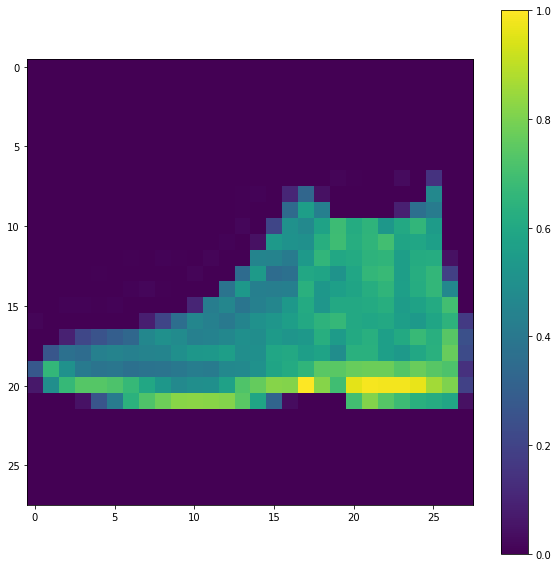

In [55]:
# 그래프로 확인하기 
plt.figure(figsize=(10,10))
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [56]:
class_names[9]

'Ankle boot'

* 예측2 
  - 훈련된 모델을 사용하여 실제 모델이 어떻게 예측하는 지 test_images로 확인

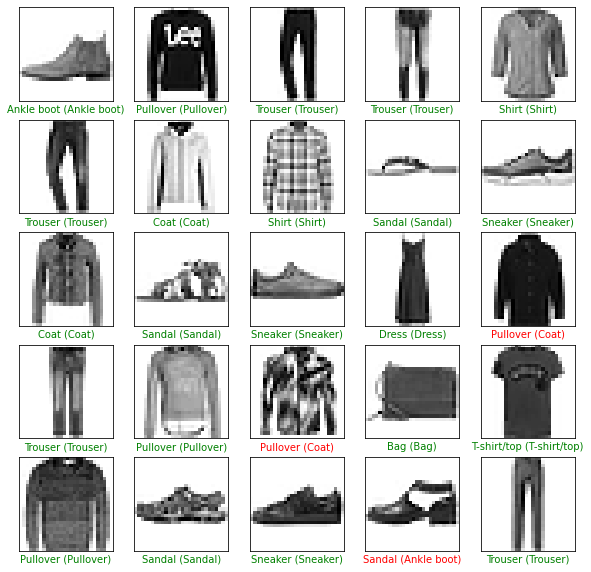

In [59]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  # predictions에서 가장 큰 값을 predicted_label로 가져온다 
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  # 이때, 실제 test_label과 일치하면 초록색 
  if predicted_label == true_label:
    color ='green'
  # 일치하지 않으면 
  else:
    color ='red'
  plt.xlabel('{} ({})'.format(class_names[predicted_label], 
                              class_names[true_label]),
                              color=color) 
plt.show()

In [76]:
# 이미지 그리는 함수 
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color ='blue'
  else:
    color ='red'
  
  plt.xlabel("{}{:2.0f}% ({})". format(class_names[predicted_label], 
                              100 * np.max(predictions_array),
                              class_names[true_label]),
                              color=color)

In [69]:
# 막대 그래프 그리는 함수 
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label, = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

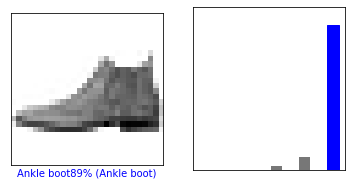

In [70]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2,)
plot_value_array(i, predictions, test_labels)
plt.show()

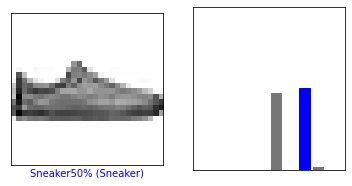

In [74]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2,)
plot_value_array(i, predictions, test_labels)
plt.show()

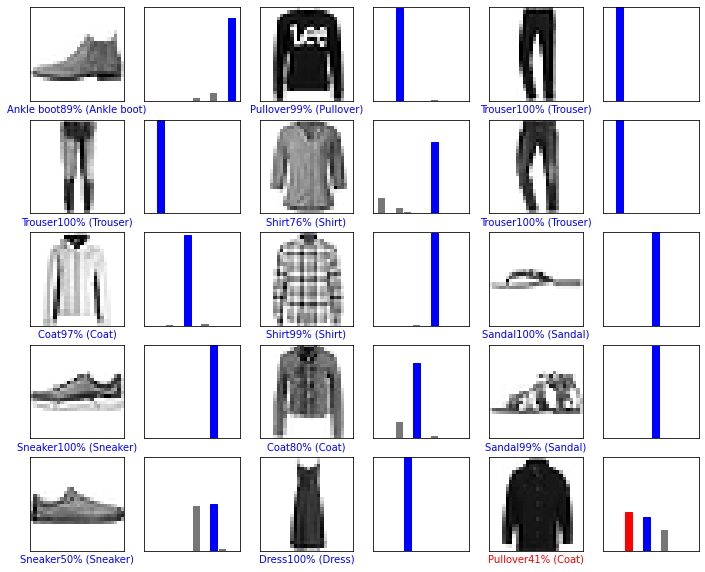

In [77]:
# 처음 x 개의 테스트 이미지와 예측 레이블, 진짜 레이블 출력 
# 올바른 예측은 파랑색, 잘못된 예측은 빨강색으로 나타냄 

num_rows = 5
num_cols =3 

num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [78]:
# 테스트 세트에서 이미지 하나를 선택합니다. 
img = test_images[0]
print(img.shape)

(28, 28)


In [79]:
# 이미지 하나만 사용할 때도 배치에 추가
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [80]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.90185565e-05 1.00342014e-07 2.37338827e-06 2.34501826e-07
  2.26991077e-07 2.64386404e-02 5.02480070e-05 8.42887387e-02
  7.29093372e-05 8.89127433e-01]]


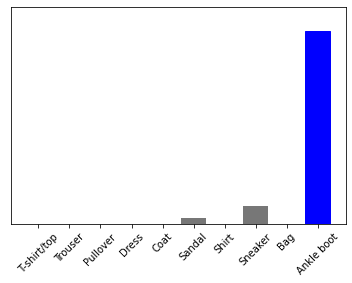

In [82]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [83]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9
